<a href="https://colab.research.google.com/github/seema329/EDA/blob/main/Copy_of_Applied_Statistics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Purchase Behavior Analysis using Descriptive Statistics

##Problem Statement

🔍 **Problem Statement**:

Welcome to the Probability and Statistics project! 📊🔍 In this exciting journey, you'll get the chance to apply the concepts you've learned in probability theory and statistics to analyze a real-world dataset. This project is your opportunity to dive deep into the world of data analysis and gain practical experience with the tools and techniques you've been learning. 🚀

🎯 **Objective**:

Your mission is to analyze the provided dataset containing customer information and purchasing behavior to make informed decisions. Your goal is to identify patterns, trends, and correlations that will help your company optimize its marketing efforts and increase offer acceptance rates. 🎉

##About the Dataset



Here's the link to the [dataset](https://docs.google.com/spreadsheets/d/12ln9iTNcVNOMYi_AU-OczKpa_KIP8XyVbsjk81Na8Yk/edit?usp=sharing)


This data was gathered during last year's campaign.
Data description is as follows;

1. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
1. ID - Unique ID of each customer
1. Year_Birth - Age of the customer
1. Complain - 1 if the customer complained in the last 2 years
1. Dt_Customer - date of customer's enrollment with the company
1. Education - customer's level of education
1. Marital - customer's marital status
1. Kidhome - number of small children in customer's household
1. Teenhome - number of teenagers in customer's household
1. Income - customer's yearly household income
1. MntFishProducts - the amount spent on fish products in the last 2 years
1. MntMeatProducts - the amount spent on meat products in the last 2 years
1. MntFruits - the amount spent on fruits products in the last 2 years
1. MntSweetProducts - amount spent on sweet products in the last 2 years
1. MntWines - the amount spent on wine products in the last 2 years
1. MntGoldProds - the amount spent on gold products in the last 2 years
1. NumDealsPurchases - number of purchases made with discount
1. NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
1. NumStorePurchases - number of purchases made directly in stores
1. NumWebPurchases - number of purchases made through the company's website
1. NumWebVisitsMonth - number of visits to company's website in the last month
1. Recency - number of days since the last purchase





##Task 1 - Basic CleanUp

- **Clean and preprocess the dataset (handling missing values, data types, etc.).**

- **Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

**Import all the essential libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#Load Dataset
#mount the drive to the notebook
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
# Dataset First Look
#importing the dataset from the drive
df = pd.read_csv("/content/drive/MyDrive/Superstore Marketing Data - Sheet1.csv")
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.shape

(2240, 22)

In [ ]:
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [ ]:
df.drop_duplicates(inplace= True)

In [ ]:
df.shape

(2240, 22)

In [ ]:
df.drop(['Id','Dt_Customer', 'Complain', ''], axis=1)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,1970,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1
1,1961,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1
2,1958,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0
3,1967,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0
4,1989,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,0,1,99,372,18,126,47,48,78,2,5,2,11,4,0
2236,1977,2n Cycle,Married,31056.0,1,0,99,5,10,13,3,8,16,1,1,0,3,8,0
2237,1976,Graduation,Divorced,46310.0,1,0,99,185,2,88,15,5,14,2,6,1,5,8,0
2238,1978,Graduation,Married,65819.0,0,0,99,267,38,701,149,165,63,1,5,4,10,3,0


**Insight of data**

1) There are 2240 rows and 19 columns.

2) dtypes are integer, object and float.

3) Drop columns -Id, Dt_Customer, Complain (as they are not required in the data analysis.

**Analyze the distribution of customer demographics (age, education, marital status) using descriptive statistics and visualizations.**

In [ ]:
df['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

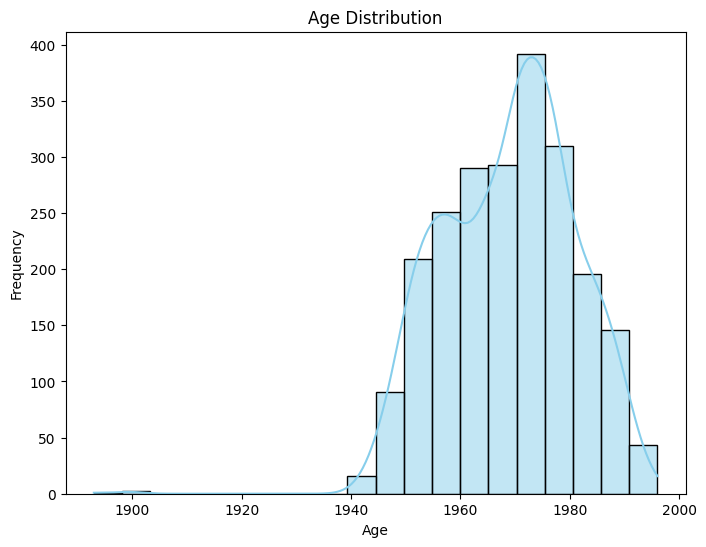

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Year_Birth'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

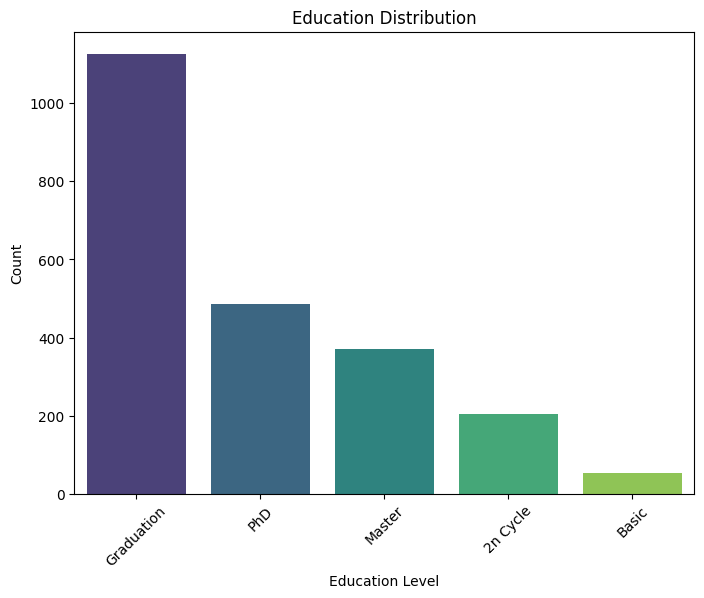

In [ ]:
#visualisation
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Education', order=df['Education'].value_counts().index, palette='viridis')
plt.title('Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

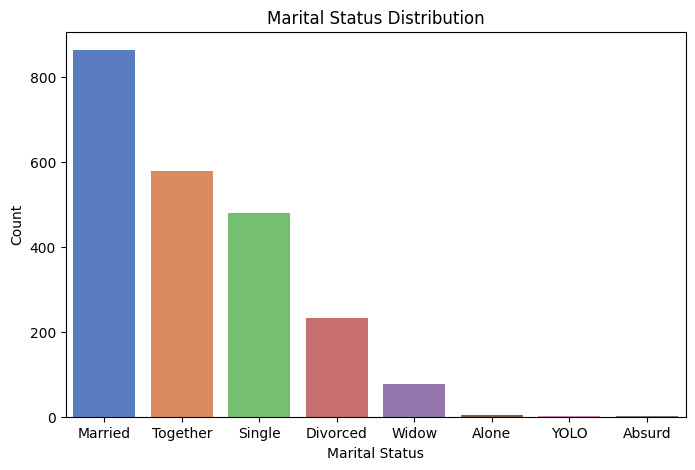

In [ ]:
#VISUALISATION OF MATRITAL STATUS DISTRIBUTION
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Marital_Status', order=df['Marital_Status'].value_counts().index, palette='muted')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()



**Deliverables**:

- **Cleaned and Preprocessed Dataset**:

1) There are 2240 rows and 22 columns.

2) dtypes are integer, object and float.

3) Drop columns -Id, Dt_Customer, Complain (as they are not required in the data analysis). It changes the shape of data -2240 rows and 19 columns.

4) There are 24 null values in Income column (no need of imputation as the missing values are small in number as compared to data provided, it will not impact the data analysis)

5) Droped duplicates values for maintain consistency in data and no repetation of data as well.

- **Summary of Basic Statistics**:

Distribution of data among Year_Birth, education and marital status.

1) Mostly year birh 1960- 1980 are the cusomers.

2) Graduation number is high.

3) Married couples do more shopping.



##Task 2 - Descriptive Statistics 📊

- **Calculate measures of central tendency (mean, median, mode) and measures of dispersion (variance, standard deviation) for key variables. Identify and handle outliers if necessary.**


In [ ]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [ ]:
from scipy.stats import mode

# Selecting key numerical variables
numerical_variables = ['Year_Birth', 'Income', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency']

# Calculate Measures of Central Tendency and Dispersion
summary_statistics = pd.DataFrame(index=numerical_variables)
summary_statistics['Mean'] = df[numerical_variables].mean()
summary_statistics['Median'] = df[numerical_variables].median()
summary_statistics['Mode'] = df[numerical_variables].mode().iloc[0]
summary_statistics['Variance'] = df[numerical_variables].var()
summary_statistics['Standard Deviation'] = df[numerical_variables].std()

# Display summary statistics
print("Summary Statistics:")
print(summary_statistics)

# Identify and Handle Outliers using IQR
for variable in numerical_variables:
    # Calculate quartiles
    Q1 = df[variable].quantile(0.25)
    Q3 = df[variable].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define the lower and upper bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and handle outliers by replacing them with the median
    outliers = (df[variable] < lower_bound) | (df[variable] > upper_bound)
    df.loc[outliers, variable] = df[variable].median()

# Display the result after handling outliers
print("\nData after handling outliers:")
print(df[numerical_variables].describe())


Summary Statistics:
                             Mean   Median    Mode      Variance  \
Year_Birth            1968.805804   1970.0  1976.0  1.436179e+02   
Income               52247.251354  51381.5  7500.0  6.336838e+08   
NumDealsPurchases        2.325000      2.0     1.0  3.733542e+00   
NumCatalogPurchases      2.662054      2.0     0.0  8.544517e+00   
NumStorePurchases        5.790179      5.0     3.0  1.056873e+01   
NumWebPurchases          4.084821      4.0     2.0  7.721252e+00   
NumWebVisitsMonth        5.316518      6.0     7.0  5.888606e+00   
Recency                 49.109375     49.0    56.0  8.388237e+02   

                     Standard Deviation  
Year_Birth                    11.984069  
Income                     25173.076661  
NumDealsPurchases              1.932238  
NumCatalogPurchases            2.923101  
NumStorePurchases              3.250958  
NumWebPurchases                2.778714  
NumWebVisitsMonth              2.426645  
Recency                       2

**Deliverables**:

- **Descriptive statistics that reveal the central tendencies, variations, and potential outliers in the dataset.**:

1.  Used describe for getting central tendencies and variations of the all key variables.

2.  key variables choosen for identify & handling outliers.

   -Year_Birth   
   -Income                 
   -NumDealsPurchases           
   -NumCatalogPurchases         
   -NumStorePurchases        
   -NumWebPurchases
   -NumWebVisitsMonth        
   -Recency   

3. Used IQR (Interquartile range) for handling outliers,

4. Again we get the central tendency and variations after handling outliers.
  

## Task 3 - Probability Distributions 🎲

- **Identify variables that could follow specific probability distributions (e.g., Binomial, Normal). Calculate probabilities and expected values based on these distributions.**



Binomial Distribution:

Complain: This variable represents whether a customer complained in the last 2 years (1 if complained, 0 otherwise). This binary outcome is a good candidate for a binomial distribution.

In [ ]:
from scipy.stats import binom

# Assuming 'df' is your DataFrame

# Probability of a customer complaining (complain=1)
p_complain = df['Complain'].mean()

# Expected number of customers complaining
expected_complainers = len(df) * p_complain

print(f"Probability of a customer complaining: {p_complain:.4f}")
print(f"Expected number of complainers: {expected_complainers:.2f}")


Probability of a customer complaining: 0.0094
Expected number of complainers: 21.00


Poisson Distribution:

NumDealsPurchases: The number of purchases made with a discount could potentially follow a Poisson distribution if the number of events (discount purchases) is rare and independent.

In [ ]:
from scipy.stats import poisson

# Assuming 'df' is your DataFrame

# Fit a Poisson distribution to the NumDealsPurchases data
mu_purchases = df['NumDealsPurchases'].mean()

# Probability of a specific number of discount purchases (e.g., 2)
probability_2_discount_purchases = poisson.pmf(2, mu_purchases)

print(f"Mean number of discount purchases: {mu_purchases:.2f}")
print(f"Probability of 2 discount purchases: {probability_2_discount_purchases:.4f}")


Mean number of discount purchases: 2.06
Probability of 2 discount purchases: 0.2704


**Deliverables**:

- **Determination of suitable probability distributions for relevant variables and corresponding calculated probabilities and expected values.**:

* **Binomial Distribution**:

*Complain*: This variable represents whether a customer complained in the last 2 years (1 if complained, 0 otherwise). This binary outcome is a good candidate for a binomial distribution.

**Result:** Probability of a customer complaining: 0.0094
        Expected number of complainers: 21.00

* **Poisson Distribution:**

*NumDealsPurchases*: The number of purchases made with a discount could potentially follow a Poisson distribution if the number of events (discount purchases) is rare and independent.

**Result:** Mean number of discount purchases: 2.06
Probability of 2 discount purchases: 0.2704
  

## Task 4: Insights and Customer Segmentation 📈

- **Explore relationships between customer characteristics and spending habits. Segment customers based on their behaviors and characteristics.**

<ipython-input-35-089f28d6922b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


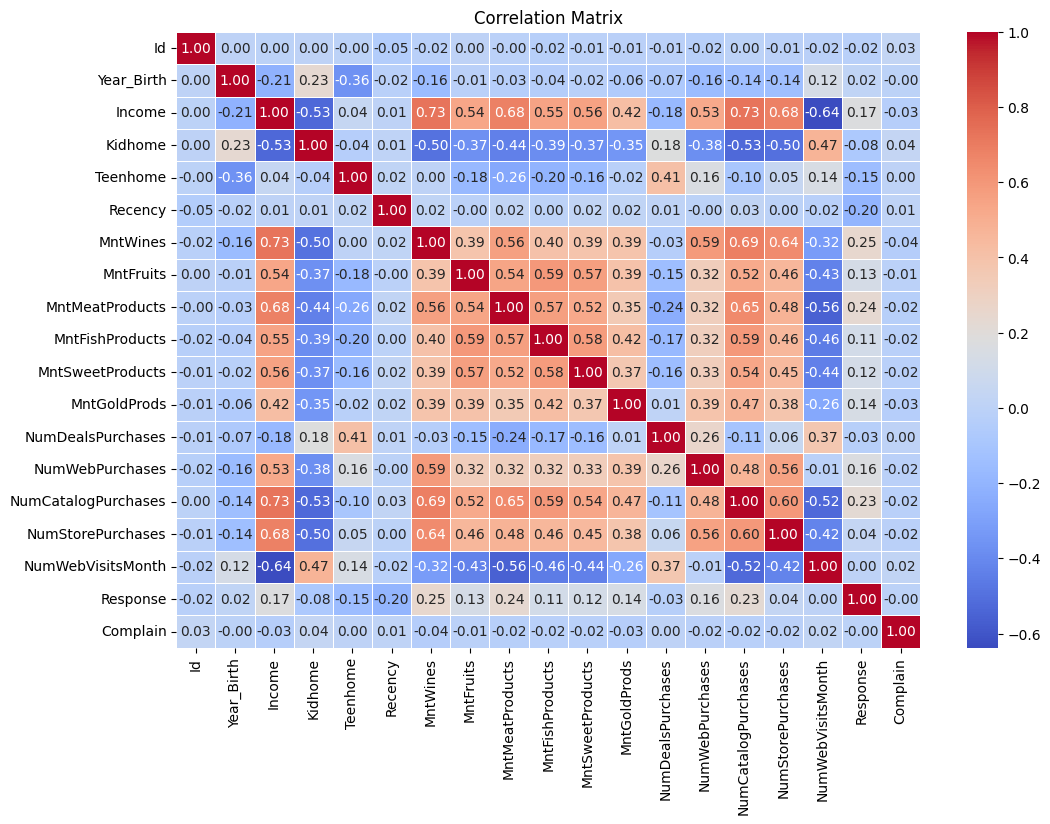

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


Explore relationships between categorical variables and spending habits.

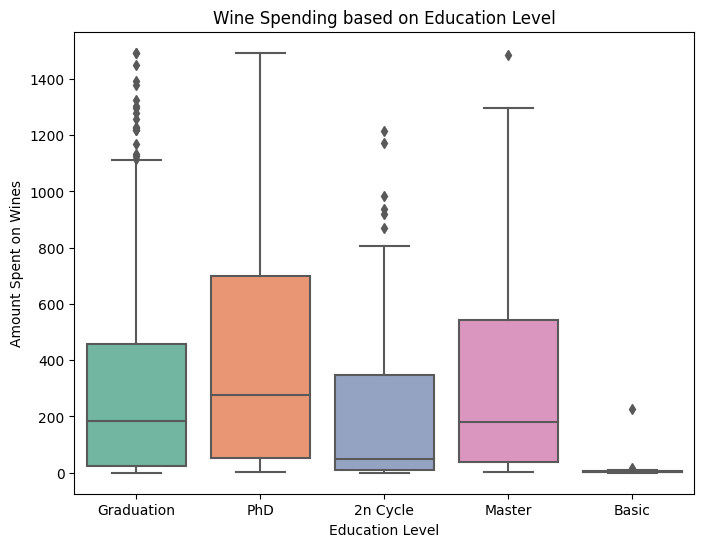

In [ ]:
# Boxplot of spending habits based on education level
plt.figure(figsize=(8, 6))
sns.boxplot(x='Education', y='MntWines', data=df, palette='Set2')
plt.title('Wine Spending based on Education Level')
plt.xlabel('Education Level')
plt.ylabel('Amount Spent on Wines')
plt.show()

**Deliverables**:

- **Key insights regarding relationships between variables and distinct customer segments based on behaviors.**

There is relation between the income and purchasing power of customer (As shown in the correlation chart)

Education play also crucial role in the purchasing interest of product as shown in the second chart (used box plot) phd holder spent like to spend money on wines in comparison of others.

  

## Task 5: Conclusion and Recommendations

- **Create clear visualizations to showcase your findings. Use insights to make recommendations for the company based on your analysis.**

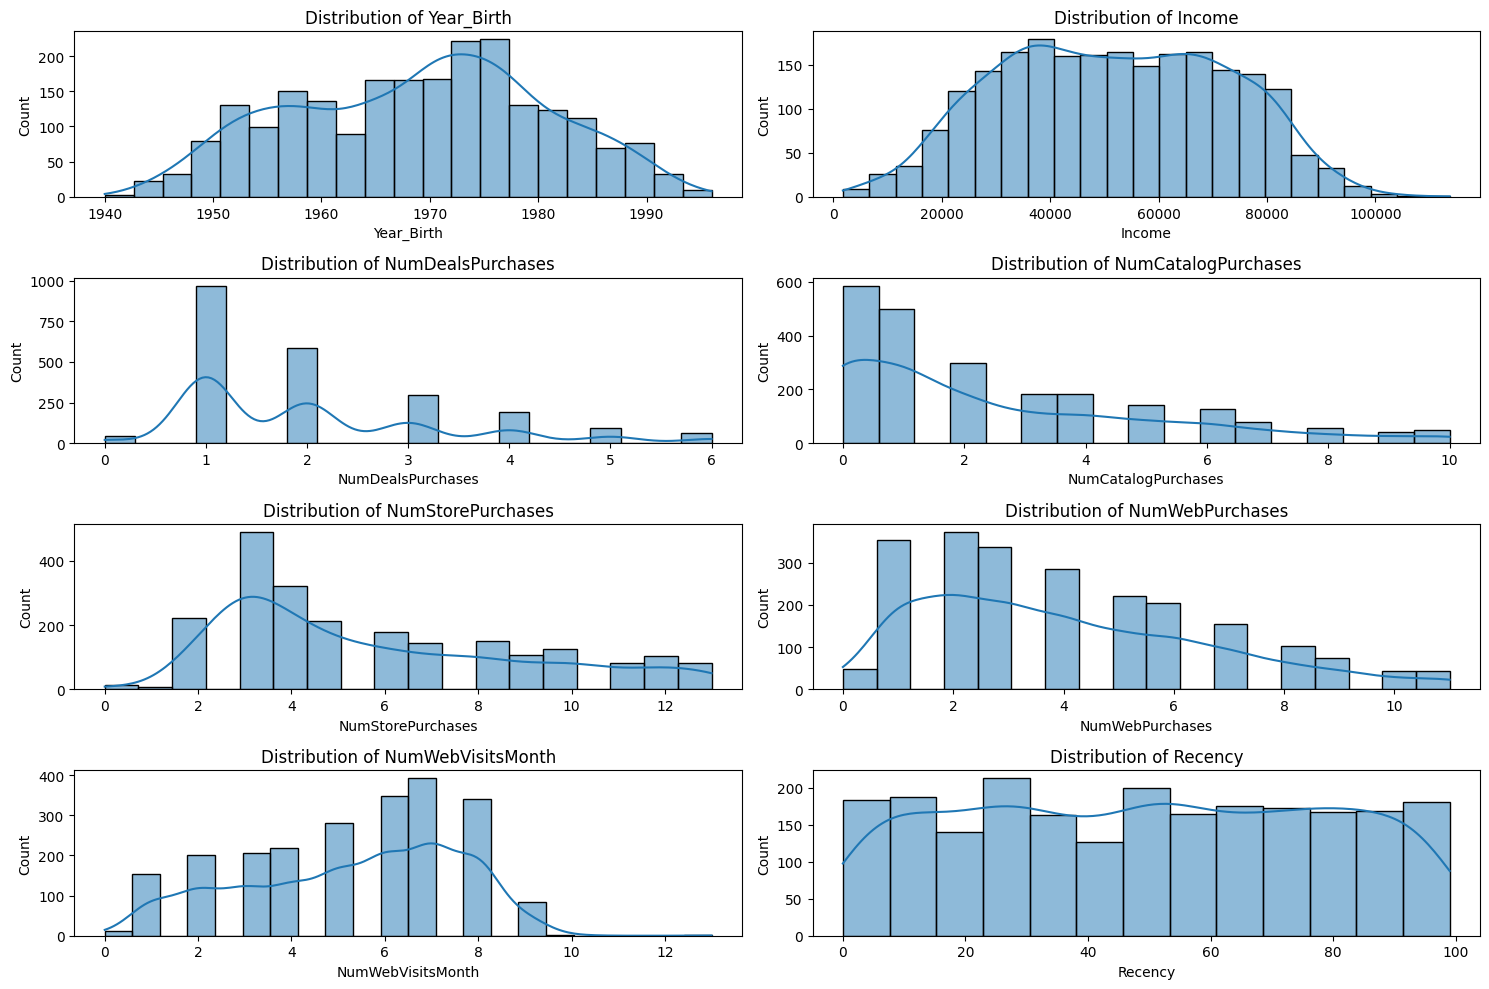

In [ ]:
# Selecting key numerical variables
numerical_variables = ['Year_Birth', 'Income', 'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency']

# Create histograms for key numerical variables
plt.figure(figsize=(15, 10))
for i, variable in enumerate(numerical_variables, 1):
    plt.subplot(4, 2, i)
    sns.histplot(df[variable], kde=True)
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)

plt.tight_layout()
plt.show()



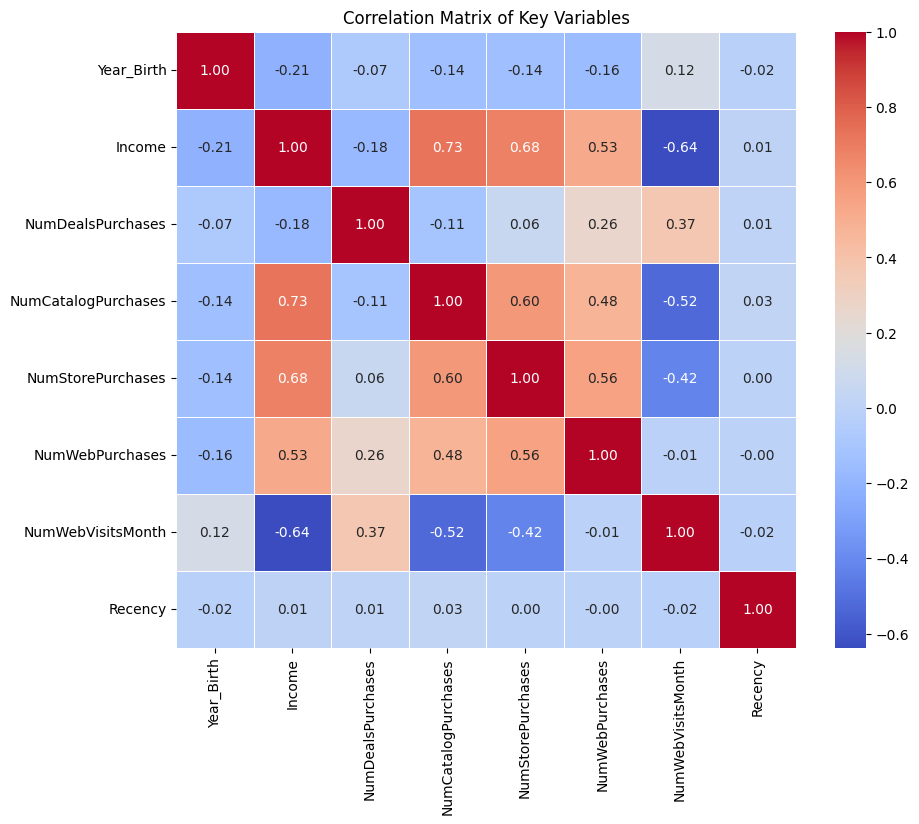

In [ ]:
# Calculate correlation matrix
correlation_matrix = df[numerical_variables].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Key Variables')
plt.show()


**Deliverables**:

- **Well-designed visualizations that visually represent your insights and actionable recommendations based on customer behavior analysis.**

1.  **Insight**

a) **Histogram plot**- Distribution of data :
   
   Year_Birth-> 1970- 1980 year birth customers are more.

   Income-> Those who have income between 20,000- 10,00,000 come to visit in the shop. Where 40,000 to 60,000 income are more in numbers.

   NumDealsPurchases-> The highest number of deal purchases is 1,000.

   NumCatalogPurchases-> The highest number of catalog purcheses is between 400 to 600.
  
   NumStorePurchases-> The highest number of store purchses is above 300.
   
   NumWebPurchases-> The highest number of web purchases is above 300.
   
   NumWebVisitsMonth-> The highest number of web visit month is above 300
   
   Recency-> The recency is between 150-200.

b) **Correlation**

1) Income is corelated to numCatlogPurchase, numStorePurchase, numWebPurchases.

2) NumCatlogPurchase is corelated to numStorePurchases and Income.

3) NumWebPurchases is corelated to numStorePurchased and Income.






**Recommendations:**

Analyze the clusters to understand different customer segments. Tailor marketing strategies based on the preferences and behaviors of each segment.
Promote Web Purchases for High-Income Customers:

Focus on promoting web purchases, especially for high-income customers. Consider targeted promotions or incentives to boost online sales.
Monitor and Address Recency:

Keep an eye on the recency of purchases. Encourage customers with longer durations since the last purchase to engage with new offers or promotions.
Optimize Marketing for Different Demographics:

Tailor marketing messages and offers based on demographics (age, education, marital status). Use insights from the correlation matrix to understand relationships between variables.

## Bonus Task - Geogebra Experiment



Here's the link to an intriguing GeoGebra experiment: [GeoGebra Experiment Link](https://www.geogebra.org/m/LZbwMZtJ)

This experiment lets you simulate coin flips as per your preferences and specifications!

Your task involves recording a video where you'll explain the concept of the **Law of Large Numbers** using this experiment. Dive further into the experience by adjusting the number of coins and exploring varying coin biases. 🪙📹🔍

  **Topic:**- law of large numbers with the example of GeoGebra expriment

**Video link** :-https://drive.google.com/file/d/1Gs5_yzrHrj7eLuCnjznYzjRMChaBSEJI/view?usp=sharing
